In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dominikebrowski","key":"5806421d00eadc68d024db54baee686d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.01G/2.04G [00:22<00:00, 172MB/s]
100% 2.04G/2.04G [00:22<00:00, 98.8MB/s]


In [ ]:
import os
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms
from collections import Counter
import numpy as np




Ładowanie danych

In [ ]:
data_dir = '/content/plantvillage dataset/segmented'

dataset = ImageFolder(data_dir)


EDA

Ilość klas

In [ ]:
len(dataset.classes)


38

Nazwy klas

In [ ]:
dataset.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

Ilość obrazów danej klasy

In [ ]:
for category_index, count in Counter(dataset.targets).items():
  category_name = dataset.classes[category_index]
  print(f'Kategoria: {category_name}, liczba obrazów: {count}')

Kategoria: Apple___Apple_scab, liczba obrazów: 630
Kategoria: Apple___Black_rot, liczba obrazów: 621
Kategoria: Apple___Cedar_apple_rust, liczba obrazów: 275
Kategoria: Apple___healthy, liczba obrazów: 1645
Kategoria: Blueberry___healthy, liczba obrazów: 1502
Kategoria: Cherry_(including_sour)___Powdery_mildew, liczba obrazów: 1052
Kategoria: Cherry_(including_sour)___healthy, liczba obrazów: 854
Kategoria: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, liczba obrazów: 513
Kategoria: Corn_(maize)___Common_rust_, liczba obrazów: 1192
Kategoria: Corn_(maize)___Northern_Leaf_Blight, liczba obrazów: 985
Kategoria: Corn_(maize)___healthy, liczba obrazów: 1162
Kategoria: Grape___Black_rot, liczba obrazów: 1180
Kategoria: Grape___Esca_(Black_Measles), liczba obrazów: 1384
Kategoria: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), liczba obrazów: 1076
Kategoria: Grape___healthy, liczba obrazów: 423
Kategoria: Orange___Haunglongbing_(Citrus_greening), liczba obrazów: 5507
Kategoria: Peach___Ba

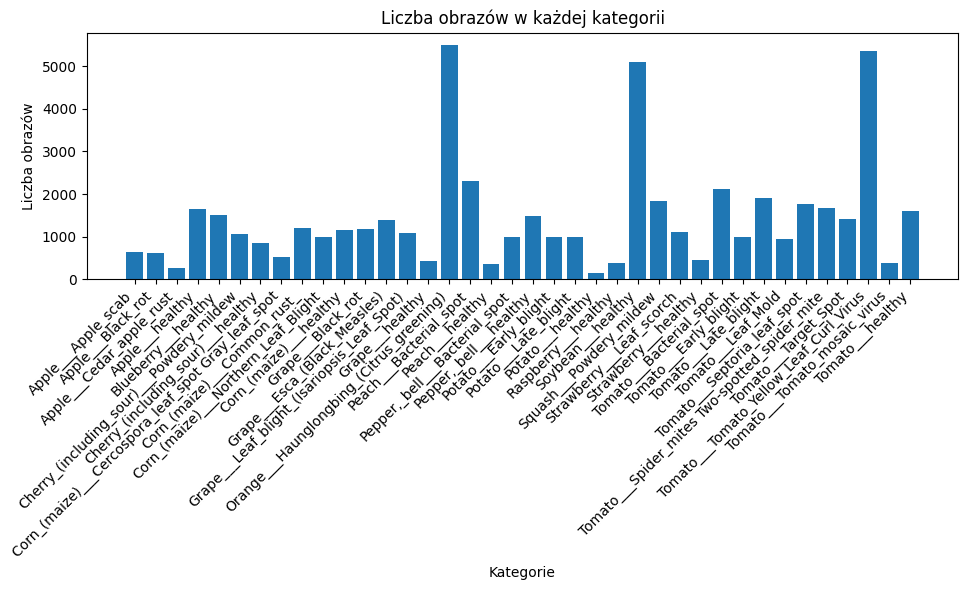

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dataset.classes, Counter(dataset.targets).values())
plt.xlabel('Kategorie')
plt.ylabel('Liczba obrazów')
plt.title('Liczba obrazów w każdej kategorii')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Przykładowe obrazy

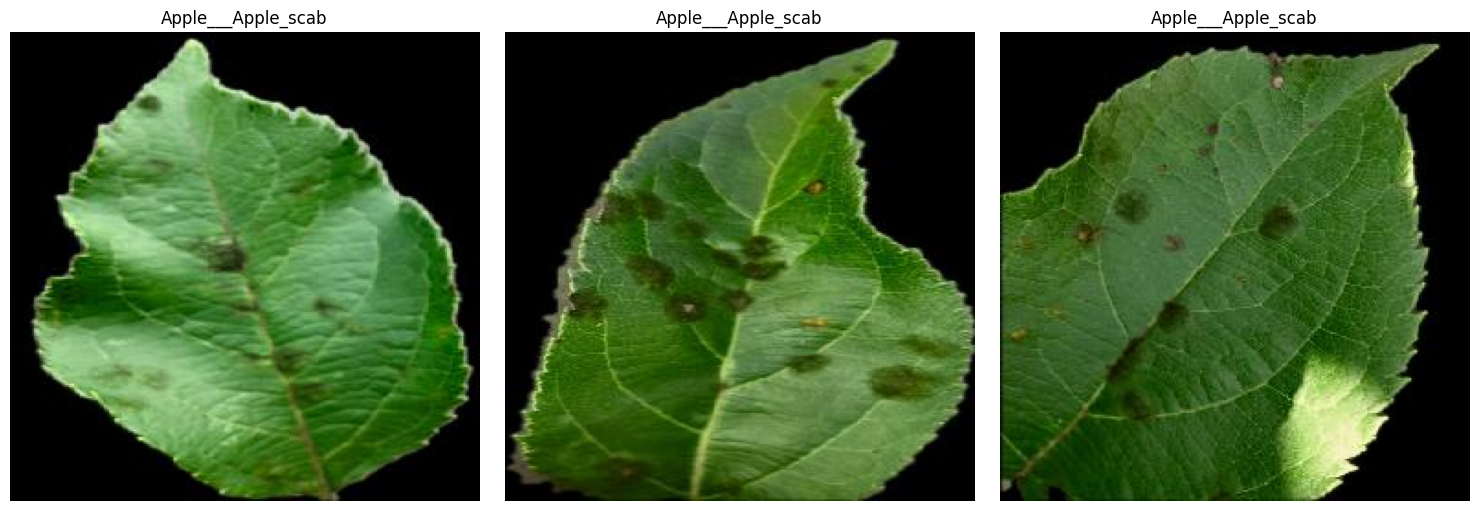

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    img, label = dataset[i]
    axes[i].imshow(img)
    axes[i].set_title(dataset.classes[label])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Podział danych na zbiory treningowe walidacyjne i testowe

In [ ]:
from torch.utils.data import random_split
train_size = int(0.80 * len(dataset))
valid_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - valid_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

Transformacje

Transformacja danych treningowych

In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(degrees = (-30,30)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

Transformacja danych walidacyjnych oraz testowych

In [ ]:
valid_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

Odpowiednie transformacje

In [ ]:
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = valid_test_transform
test_dataset.dataset.transform = valid_test_transform

Data Loader

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
valid_loader = DataLoader(val_dataset, batch_size = 16, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size= 32, shuffle = True)

Kilka przykładowych obrazów po augumentacji

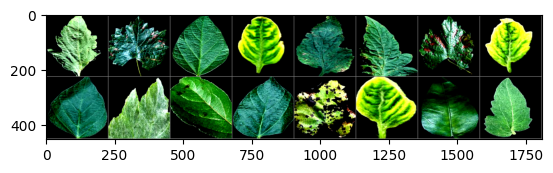

In [ ]:
import torchvision
def show_image(image):
  image = (image / 2) + 0.5 # zgodnie ze wzorem na odwrócenie normalizacji
  tensor_to_numpy = image.numpy()
  transposed_image = np.transpose(tensor_to_numpy, axes = (1,2,0)) # zmiana kolejność osi z (C, H, W) na (Height, Width, Channels)
  plt.imshow(transposed_image)
  plt.show()


train_iter = iter(train_loader)
images, labels = next(train_iter)

show_image(torchvision.utils.make_grid(images))



Przygotowanie modelu pod fine tuning
Wybrany model to ResNet101

In [ ]:
import torch
from torchvision import models
import torch.nn as nn

model = models.resnet50(pretrained=True)
features_numbers = model.fc.in_features
model.fc = nn.Linear(features_numbers, len(dataset.classes)) #nowa ostatnia wartswa

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #wybieramy czy pracujemy na GPU czy na CPU
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s]


Funkcja straty

In [ ]:
criterion = nn.CrossEntropyLoss()

Optymalizator

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9) # tutaj mogę testować!!

Trenowanie modelu

In [ ]:
for epoch in range(2):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:

    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = model(images)

    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item() * images.size(0) # mnożymy stratę dla batcha przez jego rozmiar i uzyskujemy

  epoch_loss = running_loss / len(train_loader.dataset)
  print(f'Epoch {epoch + 1}/{2}, Loss: {epoch_loss:.4f}')

Epoch 1/2, Loss: 0.3002
Epoch 2/2, Loss: 0.0521
